# The risk free asset
#### Author: Prof. Gustavo Soares

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### BQNT

If you are using BQNT you should import and initialize the BQL service:

In [2]:
import bql
bq = bql.Service()

## Overnight rates

### Brazilian CDI case

#### BQNT

Grab the CDI rate time series like this:

In [3]:
start_date = '2007-12-31'
end_date = pd.to_datetime('today')
cdi_rate_bbg_ticker = 'BZDIOVRA Index'
fields = {'price' : bq.data.px_last(fill='PREV', start=start_date, end=end_date)}
req = bql.Request(cdi_rate_bbg_ticker, fields)
res = bq.execute(req)
cdi_series = bql.combined_df(res).drop('CURRENCY', 1).set_index('DATE')
cdi_series.to_csv('CDI_time_series.csv') # This is if you want to save it in a .csv file

#### Importing from .csv

Grab the CDI rate time series like this:

In [4]:
cdi_series = pd.read_csv('CDI_time_series.csv', index_col=0)
cdi_series.index = pd.to_datetime(cdi_series.index)

#### Plot time series

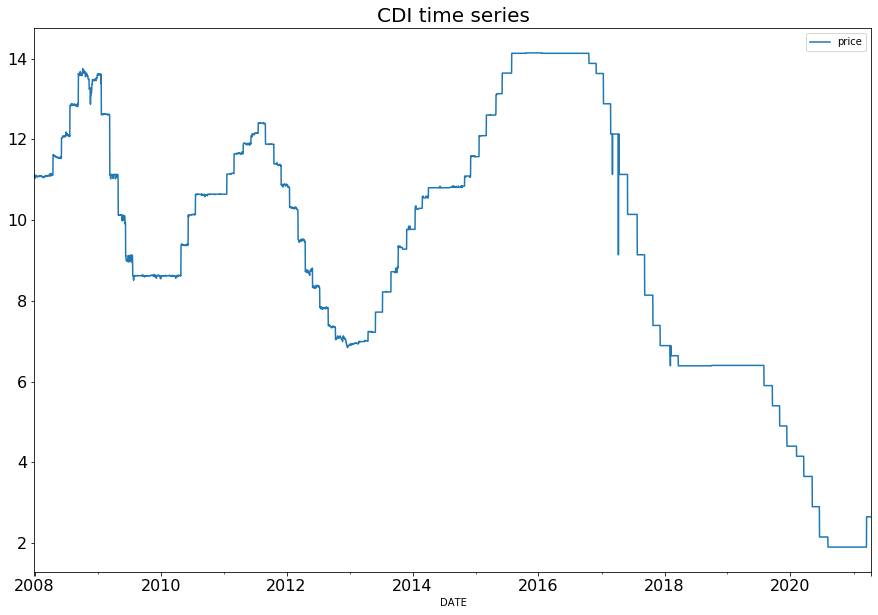

In [5]:
cdi_series.plot(figsize=(15,10), fontsize=16)
plt.title('CDI time series', fontsize=20)
plt.show()

#### Daily accrual

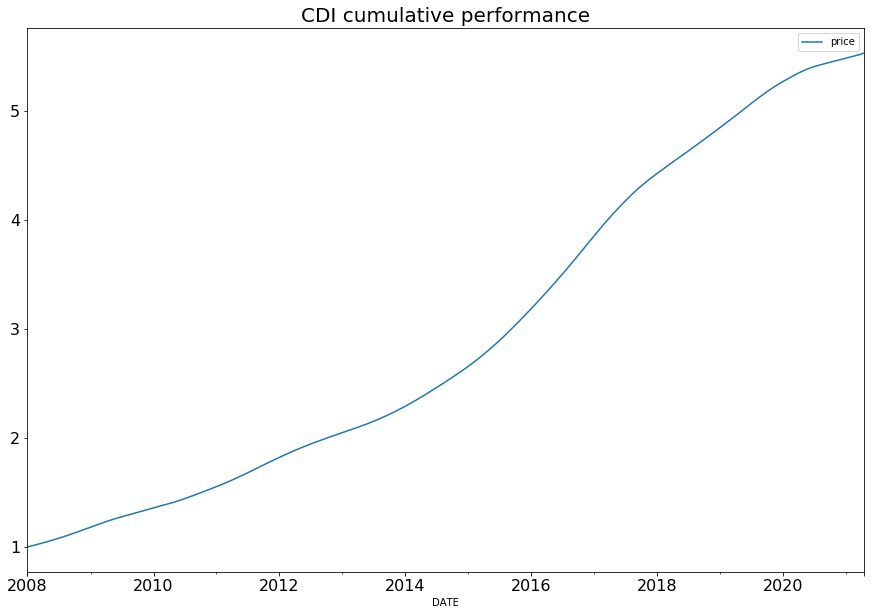

In [6]:
daily_returns = (1+cdi_series/100.) ** (1/252) - 1
cumulative_performance = (1 + daily_returns).cumprod()
cumulative_performance.plot(figsize=(15,10), fontsize=16)
plt.title('CDI cumulative performance', fontsize=20)
plt.show()

#### Risk-free asset return between $t_{0}$ and $t_{1}$

In [7]:
t0 = '2020-12-31'
t1 = '2021-01-31'
rf = cumulative_performance.loc[pd.to_datetime(t1)]/cumulative_performance.loc[pd.to_datetime(t0)]-1
rf = rf.iloc[0]
print(f'The return of the risk-free asset CDI between {t0} and {t1} is {rf:.2%}')

The return of the risk-free asset CDI between 2020-12-31 and 2021-01-31 is 0.23%


### Exercise:
Calcualte the returns of US SOFR and Libor overnight rates between two given dates

## Fixed rates

### Libor 3M case

#### BQNT

Grab the Libor 3M rate time series like this:

In [8]:
start_date = '2007-12-31'
end_date = pd.to_datetime('today')
libor3m_bbg_ticker = 'US0003M Index'
fields = {'price' : bq.data.px_last(fill='PREV', start=start_date, end=end_date)}
req = bql.Request(libor3m_bbg_ticker, fields)
res = bq.execute(req)
libor3m_series = bql.combined_df(res).drop('CURRENCY', 1).set_index('DATE')
libor3m_series.to_csv('Libor3M_time_series.csv') # This is if you want to save it in a .csv file

#### Importing from .csv

Grab the Libor 3M rate time series like this:

In [9]:
libor3m_series = pd.read_csv('Libor3M_time_series.csv', index_col=0)
libor3m_series.index = pd.to_datetime(cdi_series.index)

#### Plot time series

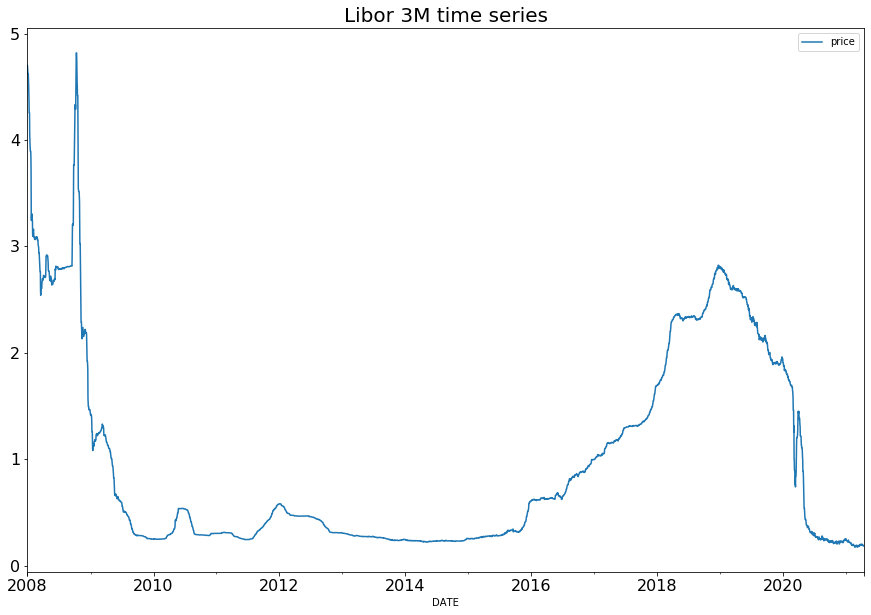

In [10]:
libor3m_series.plot(figsize=(15,10), fontsize=16)
plt.title('Libor 3M time series', fontsize=20)
plt.show()

#### Risk-free asset return between $t_{0}$ and $t_{1}$

In [11]:
t0 = '2020-12-31'
t1 = '2021-01-31'
t = (pd.to_datetime(t1) - pd.to_datetime(t0)).days/360
libor3mt0 = libor3m_series.loc[pd.to_datetime(t0)].iloc[0]
rf = t*libor3mt0/100
print(f'The return of the risk-free asset Libor 3M between {t0} and {t1} is {rf:.2%}')

The return of the risk-free asset Libor 3M between 2020-12-31 and 2021-01-31 is 0.02%


### Exercise:
Try to use [FinanceHub's DayCount](https://github.com/Finance-Hub/FinanceHub/tree/master/calendars) functions for calculating the time $t$ for accruing interest rates and compare it with the value calculated using ```pandas``` above.

### Exercise:
Calcualte the returns of 3M T-bills between two given dates